# Fund Data Analysis and Visualization

### Importing Required Libraries

In [1]:
import pandas as pd
from typing import List, Dict
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Exploring Fund Data

In [2]:
root: str = "./files/Funds.xlsx"
fund = pd.read_excel(root,parse_dates=["Date"], date_format='%m/%d/%Y') # Transforming DATE : correct format
fund.head(5)

,Symbol,Date,Share_Price,Premiun|Discount
0,ACP,2025-01-31,$6.10,-4.54%
1,ACP,2025-01-30,$6.04,-5.48%
2,ACP,2025-01-29,$6.00,-5.81%
3,ACP,2025-01-28,$6.00,-5.66%
4,ACP,2025-01-27,$5.98,-5.97%


### Dataframe Information

In [3]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Symbol            605 non-null    object        
 1   Date              605 non-null    datetime64[ns]
 2   Share_Price       605 non-null    object        
 3   Premiun|Discount  605 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 19.0+ KB


### Data Cleaning - Share Price Conversion

In [4]:

fund["Share_Price"] = [ (lambda x: float(x.replace("$",(""))))(num) for num in fund["Share_Price"] ]
fund.head(5)

,Symbol,Date,Share_Price,Premiun|Discount
0,ACP,2025-01-31,6.10,-4.54%
1,ACP,2025-01-30,6.04,-5.48%
2,ACP,2025-01-29,6.00,-5.81%
3,ACP,2025-01-28,6.00,-5.66%
4,ACP,2025-01-27,5.98,-5.97%


### Unique Fund Symbols Analysis

In [5]:
unique_values = fund["Symbol"].unique()
for x in unique_values:
    print(x)

ACP
FOF
EVT


### Data Analysis and Visualization Functions

In [6]:
months = [
    'January', 'February', 'March', 'April', 
    'May', 'June', 'July', 'August', 
    'September', 'October', 'November', 'December'
]

def plot_share_price_simple(df: pd.DataFrame, company_name: str, color: str, months: List[str] = months) -> None:
    """
    Create a bar chart showing mean share price by month for a specific fund.
    
    Args:
        df: DataFrame containing fund data
        company_name: Name of the fund for title
        color: Color for the bars
        months: List of month names in order
    """
    # Calculate mean values by month
    data = df.groupby(df["Date"].dt.month_name())["Share_Price"].agg("mean")
    data.index = pd.Categorical(data.index, categories=months, ordered=True) # type: ignore
    data = data.sort_index()
    
    y = data.values
    x = data.index

    # Create visualization
    plt.figure(figsize=(7, 5))

    # Add value labels on bars
    for i, total in enumerate(y):
        plt.text(i, total + 0.1, f'${total:.2f}',
                 ha='center', weight='bold', color='black')

    plt.bar(x, y, color=color)
    plt.ylabel('Price $ USD')
    plt.title(f'{company_name} - Mean Share Price by Month')
    plt.xticks(rotation=30)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return

def get_fund_monthly_stats(df: pd.DataFrame, fund_name: str, months: List[str] = months) -> pd.DataFrame:
    """
    Calculate and display monthly statistics for a fund's share price.
    
    Args:
        df: DataFrame containing fund data
        fund_name: Name of the fund for reporting
        months: List of month names in order
        
    Returns:
        DataFrame with monthly statistics
    """
    agg_data = ["count", "median", "mean", "max", "min"]
    
    # Calculate statistics by month
    data = df.groupby(df["Date"].dt.month_name())["Share_Price"].agg(agg_data) # type: ignore
    data.index = pd.Categorical(data.index, categories=months, ordered=True)
    data = data.sort_index()
    
    print(f"=== MONTHLY STATISTICS - {fund_name} ===")
    print(data.round(3))
    
    return data

def get_fund_info(df: pd.DataFrame, fund_name: str) -> pd.DataFrame:
    """
    Filter dataframe to get data for a specific fund.
    
    Args:
        df: Main DataFrame containing all funds data
        fund_name: Symbol of the fund to filter
        
    Returns:
        Filtered DataFrame with only the specified fund's data
    """
    _filter = df["Symbol"] == fund_name
    data = df[_filter]
    return data
 

## ACP Fund Analysis

### Filtering ACP Fund Data

In [7]:
ACPDF = get_fund_info(fund,"ACP")
ACPDF.head(5)

,Symbol,Date,Share_Price,Premiun|Discount
0,ACP,2025-01-31,6.10,-4.54%
1,ACP,2025-01-30,6.04,-5.48%
2,ACP,2025-01-29,6.00,-5.81%
3,ACP,2025-01-28,6.00,-5.66%
4,ACP,2025-01-27,5.98,-5.97%


### Monthly Statistics for ACP Fund

In [8]:
acp_stats = get_fund_monthly_stats(ACPDF, "ACP")

=== MONTHLY STATISTICS - ACP ===
           count  median   mean   max   min
January       20    6.00  6.014  6.10  5.90
February      19    6.12  6.122  6.23  5.99
March         21    5.97  5.975  6.06  5.87
April         21    5.53  5.531  5.88  5.17
May           21    5.79  5.783  5.92  5.63
June          20    5.85  5.858  5.91  5.76
July          22    5.95  5.945  5.97  5.88
August        20    5.96  5.952  5.98  5.89
September     21    5.90  5.877  5.92  5.79
October       17    5.67  5.678  5.80  5.54


### ACP Fund Share Price Visualization

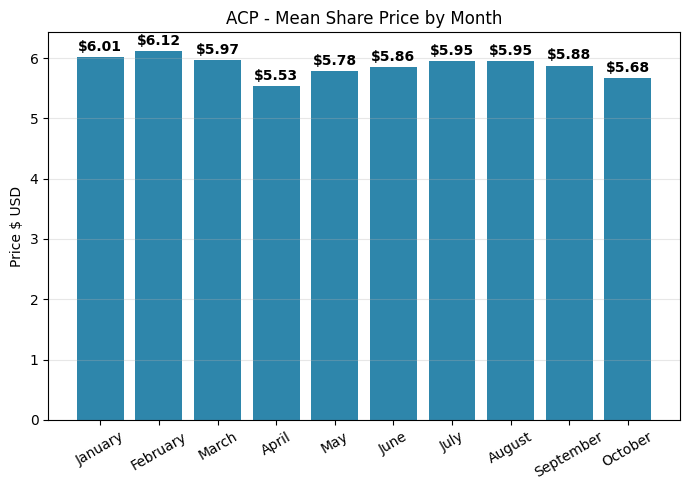

In [9]:
plot_share_price_simple(ACPDF,"ACP","#2E86AB")

## FOF Fund Analysis

### Filtering FOF Fund Data

In [10]:
FOFDF = get_fund_info(fund,"FOF")
FOFDF.head(5)

,Symbol,Date,Share_Price,Premiun|Discount
202,FOF,2025-01-31,12.60,2.36%
203,FOF,2025-01-30,12.55,1.87%
204,FOF,2025-01-29,12.43,1.72%
205,FOF,2025-01-28,12.44,1.72%
206,FOF,2025-01-27,12.51,2.79%


### Monthly Statistics for FOF Fund

In [11]:
fof_stats = get_fund_monthly_stats(FOFDF, "FOF")

=== MONTHLY STATISTICS - FOF ===
           count  median    mean    max    min
January       20  12.715  12.736  13.03  12.43
February      19  12.600  12.552  12.72  12.35
March         21  12.110  12.092  12.40  11.83
April         20  11.345  11.417  12.14  10.48
May           21  11.940  11.943  12.16  11.83
June          20  12.310  12.350  12.62  12.16
July          22  12.730  12.753  12.89  12.63
August        20  13.015  13.012  13.11  12.83
September     21  13.000  12.988  13.14  12.82
October       18  13.075  13.081  13.21  12.91


### FOF Fund Share Price Visualization

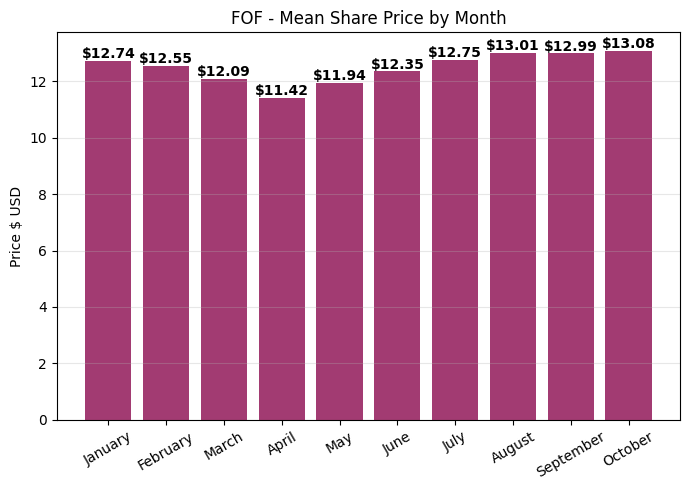

In [12]:
plot_share_price_simple(FOFDF,"FOF","#A23B72")

## EVT Fund Analysis

### Filtering EVT Fund Data 

In [13]:
EVTDF = get_fund_info(fund,"EVT")
EVTDF.head(5)

,Symbol,Date,Share_Price,Premiun|Discount
404,EVT,2025-01-31,24.56,-8.29%
405,EVT,2025-01-30,24.70,-8.38%
406,EVT,2025-01-29,24.44,-8.40%
407,EVT,2025-01-28,24.51,-8.17%
408,EVT,2025-01-27,24.56,-8.53%


### Monthly Statistics for EVT Fund

In [14]:
evt_stats = get_fund_monthly_stats(EVTDF, "EVT")

=== MONTHLY STATISTICS - EVT ===
           count  median    mean    max    min
January       20  24.335  24.274  24.70  23.86
February      19  24.290  24.246  24.73  23.61
March         21  23.370  23.305  23.77  22.77
April         20  21.685  21.749  23.35  20.31
May           21  23.090  23.019  23.57  22.32
June          20  23.500  23.546  24.10  23.25
July          22  24.130  24.144  24.40  23.92
August        20  24.060  24.021  24.44  23.60
September     21  24.270  24.276  24.47  24.07
October       17  24.460  24.443  24.68  24.16


### EVT Fund Share Price Visualization

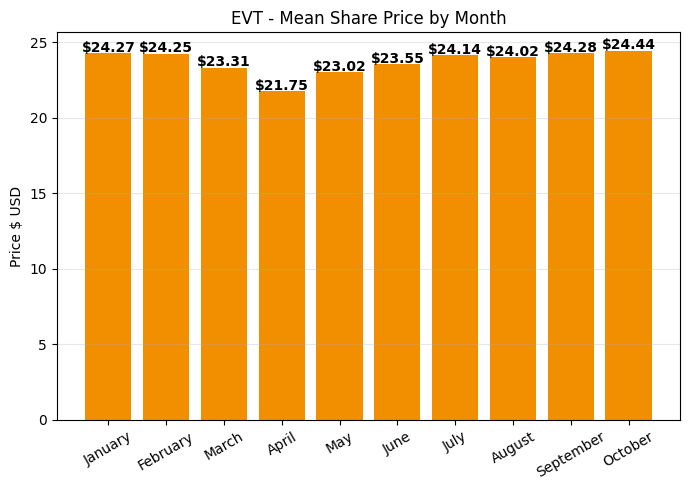

In [15]:
plot_share_price_simple(EVTDF,"EVT","#F18F01")